In [73]:
import pandas as pd
import nltk
from nltk.corpus import stopwords
from nltk.tokenize import word_tokenize
from nltk.stem import WordNetLemmatizer
import string
import re
from sklearn.feature_extraction.text import TfidfVectorizer
from sklearn.metrics import accuracy_score, precision_score, recall_score, f1_score, hamming_loss
from sklearn.ensemble import RandomForestClassifier
from sklearn.pipeline import Pipeline
from sklearn.preprocessing import MultiLabelBinarizer
import shap
import lime
import lime.lime_tabular
import numpy as np

In [2]:
pip install shap lime


     ---------------------------------------- 0.0/275.7 kB ? eta -:--:--
     -------------------------------- ----- 235.5/275.7 kB 4.8 MB/s eta 0:00:01
     ------------------------------------ - 266.2/275.7 kB 5.4 MB/s eta 0:00:01
     -------------------------------------- 275.7/275.7 kB 2.8 MB/s eta 0:00:00
  Preparing metadata (setup.py): started
  Preparing metadata (setup.py): finished with status 'done'
   ---------------------------------------- 0.0/453.1 kB ? eta -:--:--
   ----------------------------------- --- 409.6/453.1 kB 12.9 MB/s eta 0:00:01
   ---------------------------------------  450.6/453.1 kB 9.4 MB/s eta 0:00:01
   ---------------------------------------- 453.1/453.1 kB 4.7 MB/s eta 0:00:00
  Created wheel for lime: filename=lime-0.2.0.1-py3-none-any.whl size=283842 sha256=21bf97b022a506cce48c6c61f08dcb326fcb9e5ab77ae4cac6e4176c888b16ac
  Stored in directory: c:\users\admin\appdata\local\pip\cache\wheels\85\fa\a3\9c2d44c9f3cd77cf4e533b58900b2bf4487f2a17e8ec21

In [74]:
nltk.download('stopwords')
nltk.download('punkt')
nltk.download('wordnet')

[nltk_data] Downloading package stopwords to
[nltk_data]     C:\Users\Admin\AppData\Roaming\nltk_data...
[nltk_data]   Package stopwords is already up-to-date!
[nltk_data] Downloading package punkt to
[nltk_data]     C:\Users\Admin\AppData\Roaming\nltk_data...
[nltk_data]   Package punkt is already up-to-date!
[nltk_data] Downloading package wordnet to
[nltk_data]     C:\Users\Admin\AppData\Roaming\nltk_data...
[nltk_data]   Package wordnet is already up-to-date!


True

In [75]:
df1 = pd.read_csv(r"C:\Users\Admin\Downloads\dev.csv\dev.csv")

In [76]:
df1.head()

,Description,Commenting,Ogling/Facial Expressions/Staring,Touching /Groping
0,Buses approaching to this place is highly unsafe.,1,0,1
1,a man was commenting at me.,1,0,0
2,in a share auto,0,0,1
3,I was coming out of a club at night with a few...,1,0,0
4,One of my friends was molested in the crowd. T...,0,0,1


In [77]:
df1.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 990 entries, 0 to 989
Data columns (total 4 columns):
 #   Column                             Non-Null Count  Dtype 
---  ------                             --------------  ----- 
 0   Description                        990 non-null    object
 1   Commenting                         990 non-null    int64 
 2   Ogling/Facial Expressions/Staring  990 non-null    int64 
 3   Touching /Groping                  990 non-null    int64 
dtypes: int64(3), object(1)
memory usage: 31.1+ KB


In [78]:
df1.shape

(990, 4)

In [79]:
df1.describe()

,Commenting,Ogling/Facial Expressions/Staring,Touching /Groping
count,990.000000,990.000000,990.000000
mean,0.415152,0.215152,0.288889
std,0.492997,0.411135,0.453475
min,0.000000,0.000000,0.000000
25%,0.000000,0.000000,0.000000
50%,0.000000,0.000000,0.000000
75%,1.000000,0.000000,1.000000
max,1.000000,1.000000,1.000000


In [80]:
df1.columns

Index(['Description', 'Commenting', 'Ogling/Facial Expressions/Staring',
       'Touching /Groping'],
      dtype='object')

In [81]:
df2 = pd.read_csv(r"C:\Users\Admin\Downloads\train.csv\train.csv")

In [82]:
df2.head()

,Description,Commenting,Ogling/Facial Expressions/Staring,Touching /Groping
0,"Was walking along crowded street, holding mums...",0,0,1
1,This incident took place in the evening.I was ...,0,1,0
2,I WAS WAITING FOR THE BUS. A MAN CAME ON A BIK...,1,0,0
3,Incident happened inside the train,0,0,0
4,I witnessed an incident when a chain was bruta...,0,0,0


In [83]:
df2.shape

(7201, 4)

In [84]:
df2.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 7201 entries, 0 to 7200
Data columns (total 4 columns):
 #   Column                             Non-Null Count  Dtype 
---  ------                             --------------  ----- 
 0   Description                        7201 non-null   object
 1   Commenting                         7201 non-null   int64 
 2   Ogling/Facial Expressions/Staring  7201 non-null   int64 
 3   Touching /Groping                  7201 non-null   int64 
dtypes: int64(3), object(1)
memory usage: 225.2+ KB


In [85]:
df2.describe()

,Commenting,Ogling/Facial Expressions/Staring,Touching /Groping
count,7201.000000,7201.000000,7201.000000
mean,0.391612,0.211915,0.300792
std,0.488145,0.408693,0.458634
min,0.000000,0.000000,0.000000
25%,0.000000,0.000000,0.000000
50%,0.000000,0.000000,0.000000
75%,1.000000,0.000000,1.000000
max,1.000000,1.000000,1.000000


In [86]:
df3 = pd.read_csv(r"C:\Users\Admin\Downloads\test.csv\test.csv")

In [87]:
df3.head()

,Description,Commenting,Ogling/Facial Expressions/Staring,Touching /Groping
0,"During morning, a woman was walking by and thi...",1,1,0
1,A man tried to brush his penis off of a woman'...,0,0,1
2,This happened to a fellow passenger of mine tr...,0,1,0
3,ogling,0,1,0
4,When I was returning my home after finishing m...,0,0,1


In [88]:
df3.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1701 entries, 0 to 1700
Data columns (total 4 columns):
 #   Column                             Non-Null Count  Dtype 
---  ------                             --------------  ----- 
 0   Description                        1701 non-null   object
 1   Commenting                         1701 non-null   int64 
 2   Ogling/Facial Expressions/Staring  1701 non-null   int64 
 3   Touching /Groping                  1701 non-null   int64 
dtypes: int64(3), object(1)
memory usage: 53.3+ KB


In [89]:
df3.shape

(1701, 4)

In [90]:
df3.describe()

,Commenting,Ogling/Facial Expressions/Staring,Touching /Groping
count,1701.000000,1701.000000,1701.000000
mean,0.384480,0.220459,0.308642
std,0.486615,0.414678,0.462069
min,0.000000,0.000000,0.000000
25%,0.000000,0.000000,0.000000
50%,0.000000,0.000000,0.000000
75%,1.000000,0.000000,1.000000
max,1.000000,1.000000,1.000000


In [91]:
def preprocess_text(text):
    tokens = word_tokenize(text.lower())
    
    table = str.maketrans('', '', string.punctuation)
    stripped = [w.translate(table) for w in tokens]
    
    stop_words = set(stopwords.words('english'))
    words = [w for w in stripped if not w in stop_words]

    lemmatizer = WordNetLemmatizer()
    words = [lemmatizer.lemmatize(w) for w in words]
    
    preprocessed_text = ' '.join(words)
    
    return preprocessed_text

df1['Preprocessed_Description'] = df1['Description'].apply(preprocess_text)

df1.to_csv(r"C:\Users\Admin\Downloads\preprocessed_dev.csv", index=False)

In [92]:
def preprocess_text(text):
    tokens = word_tokenize(text.lower())
    
    table = str.maketrans('', '', string.punctuation)
    stripped = [w.translate(table) for w in tokens]
    
    stop_words = set(stopwords.words('english'))
    words = [w for w in stripped if not w in stop_words]

    lemmatizer = WordNetLemmatizer()
    words = [lemmatizer.lemmatize(w) for w in words]
    
    preprocessed_text = ' '.join(words)
    
    return preprocessed_text

df2['Preprocessed_Description'] = df2['Description'].apply(preprocess_text)

df2.to_csv(r"C:\Users\Admin\Downloads\preprocessed_train.csv", index=False)

In [93]:
def preprocess_text(text):
    tokens = word_tokenize(text.lower())
    
    table = str.maketrans('', '', string.punctuation)
    stripped = [w.translate(table) for w in tokens]
    
    stop_words = set(stopwords.words('english'))
    words = [w for w in stripped if not w in stop_words]

    lemmatizer = WordNetLemmatizer()
    words = [lemmatizer.lemmatize(w) for w in words]
    
    preprocessed_text = ' '.join(words)
    
    return preprocessed_text

df3['Preprocessed_Description'] = df3['Description'].apply(preprocess_text)

df3.to_csv(r"C:\Users\Admin\Downloads\preprocessed_test.csv", index=False)

In [94]:
X_train = df2['Preprocessed_Description']
y_train = df2[['Commenting', 'Ogling/Facial Expressions/Staring', 'Touching /Groping']]
X_dev = df1['Preprocessed_Description']
y_dev = df1[['Commenting', 'Ogling/Facial Expressions/Staring', 'Touching /Groping']]
X_test = df3['Preprocessed_Description']
y_test = df3[['Commenting', 'Ogling/Facial Expressions/Staring', 'Touching /Groping']]

In [95]:
pipeline = Pipeline([
    ('tfidf', TfidfVectorizer()),
    ('clf', RandomForestClassifier())
])
pipeline.fit(X_train, y_train)

Pipeline(steps=[('tfidf', TfidfVectorizer()),
                ('clf', RandomForestClassifier())])

In [96]:
y_dev_pred = pipeline.predict(X_dev)
accuracy_dev = accuracy_score(y_dev, y_dev_pred)
f1_dev = f1_score(y_dev, y_dev_pred, average='micro')
precision_dev = precision_score(y_dev, y_dev_pred, average='micro')
recall_dev = recall_score(y_dev, y_dev_pred, average='micro')
hamming_loss_dev = hamming_loss(y_dev, y_dev_pred)
hamming_score_dev = 1 - hamming_loss_dev

print("Development Dataset:")
print(f"Accuracy: {accuracy_dev}")
print(f"F1 Score: {f1_dev}")
print(f"Precision: {precision_dev}")
print(f"Recall: {recall_dev}")
print(f"Hamming Loss: {hamming_loss_dev}")
print(f"Hamming Score: {hamming_score_dev}")

Development Dataset:
Accuracy: 0.5848484848484848
F1 Score: 0.6562905317769131
Precision: 0.8006329113924051
Recall: 0.5560439560439561
Hamming Loss: 0.17845117845117844
Hamming Score: 0.8215488215488216


In [99]:
y_train_pred = pipeline.predict(X_train)

accuracy_train = accuracy_score(y_train, y_train_pred)
f1_train = f1_score(y_train, y_train_pred, average='micro')
precision_train = precision_score(y_train, y_train_pred, average='micro')
recall_train = recall_score(y_train, y_train_pred, average='micro')
hamming_loss_train = hamming_loss(y_train, y_train_pred)
hamming_score_train = 1 - hamming_loss_train

print("Training Dataset:")
print(f"Accuracy: {accuracy_train}")
print(f"F1 Score: {f1_train}")
print(f"Precision: {precision_train}")
print(f"Recall: {recall_train}")
print(f"Hamming Loss: {hamming_loss_train}")
print(f"Hamming Score: {hamming_score_train}")

Training Dataset:
Accuracy: 0.9575059019580614
F1 Score: 0.9668525402726146
Precision: 0.9753125
Recall: 0.9585380835380836
Hamming Loss: 0.01981206313937879
Hamming Score: 0.9801879368606212


In [98]:
y_test_pred = pipeline.predict(X_test)
accuracy_test = accuracy_score(y_test, y_test_pred)
f1_test = f1_score(y_test, y_test_pred, average='micro')
precision_test = precision_score(y_test, y_test_pred, average='micro')
recall_test = recall_score(y_test, y_test_pred, average='micro')
hamming_loss_test = hamming_loss(y_test, y_test_pred)
hamming_score_test = 1 - hamming_loss_test

print("\nTest Dataset:")
print(f"Accuracy: {accuracy_test}")
print(f"F1 Score: {f1_test}")
print(f"Precision: {precision_test}")
print(f"Recall: {recall_test}")
print(f"Hamming Loss: {hamming_loss_test}")
print(f"Hamming Score: {hamming_score_test}")


Test Dataset:
Accuracy: 0.6067019400352733
F1 Score: 0.6491365777080063
Precision: 0.8319919517102615
Recall: 0.5321750321750321
Hamming Loss: 0.17519106407995297
Hamming Score: 0.824808935920047


In [110]:
X = df1.drop(columns=['Commenting', 'Ogling/Facial Expressions/Staring', 'Touching /Groping'])  # Features
y = df1[['Commenting', 'Ogling/Facial Expressions/Staring', 'Touching /Groping']]

In [111]:
X_train = df2.drop(columns=['Commenting', 'Ogling/Facial Expressions/Staring', 'Touching /Groping'])  # Features
y_train = df2[['Commenting', 'Ogling/Facial Expressions/Staring', 'Touching /Groping']]

In [112]:
X_test = df3.drop(columns=['Commenting', 'Ogling/Facial Expressions/Staring', 'Touching /Groping'])  # Features
y_test = df3[['Commenting', 'Ogling/Facial Expressions/Staring', 'Touching /Groping']]

In [115]:
X_encoded = pd.get_dummies(X)

In [118]:
# Step 1: Preprocess text data (example using the preprocess_text function)
X_text_processed = X['Description'].apply(preprocess_text)

In [119]:
X_processed = pd.concat([X_encoded, X_text_processed], axis=1)

In [120]:
X_train, X_test, y_train, y_test = train_test_split(X_processed, y, test_size=0.2, random_state=42)

In [123]:
# Step 1: Preprocess text data
X_train_processed = X_train['Description'].apply(preprocess_text)


In [124]:
# Step 2: Convert text data to numerical features using TfidfVectorizer
vectorizer = TfidfVectorizer()
X_train_vectorized = vectorizer.fit_transform(X_train_processed)


In [125]:
X_test_processed = X_test['Description'].apply(preprocess_text)
X_test_vectorized = vectorizer.transform(X_test_processed)


In [126]:
# Train a random forest classifier
rf_classifier = RandomForestClassifier(n_estimators=100)
rf_classifier.fit(X_train_vectorized, y_train)


RandomForestClassifier()

In [127]:
explainer = shap.TreeExplainer(rf_classifier)

In [ ]:
shap_values = explainer(X)

# Visualize SHAP values (e.g., for the first instance)
shap.plots.waterfall(shap_values[0])

# Or aggregate SHAP values across all instances
shap.summary_plot(shap_values, X)

In [ ]:
shap.summary_plot(shap_values, X)

# Example code for waterfall plot for individual instances
shap.plots.waterfall(shap_values[0])

# Example code for interactive feature importance plot using Plotly
import plotly.express as px

def plot_feature_importance(class_index):
    class_shap_values = shap_values[:, class_index]
    avg_shap_values = np.mean(class_shap_values, axis=0)
    feature_names = [f"Feature {i}" for i in range(len(avg_shap_values))]
    fig = px.bar(x=feature_names, y=avg_shap_values, labels={'x': 'Feature', 'y': 'SHAP Value'})
    fig.show()

plot_feature_importance(class_index=0)  # Example for visualizing features for class 0

# Example code for visualizing evaluation metrics
def plot_hamming_score(hamming_scores):
    classes = [f"Class {i}" for i in range(len(hamming_scores))]
    plt.bar(classes, hamming_scores)
    plt.xlabel('Classes')
    plt.ylabel('Hamming Score')
    plt.title('Hamming Score for Each Class')
    plt.show()

def plot_xai_metrics(identity, separability, similarity, stability):
    metrics = ['Identity', 'Separability', 'Similarity', 'Stability']
    values = [identity, separability, similarity, stability]
    plt.figure(figsize=(8, 6))
    plt.plot(metrics, values, marker='o')
    plt.xlabel('Evaluation Metric')
    plt.ylabel('Value')
    plt.title('XAI Model Evaluation Metrics')
    plt.grid(True)
    plt.show()

# Usage
hamming_scores = [0.85, 0.75, 0.90]  # Example hamming scores for three classes
plot_hamming_score(hamming_scores)

# Example XAI model evaluation metrics
identity = 0.85
separability = 0.75
similarity = 0.90
stability = 0.80
plot_xai_metrics(identity, separability, similarity, stability)

In [134]:
pip install wordcloud


   ---------------------------------------- 0.0/300.2 kB ? eta -:--:--
   - -------------------------------------- 10.2/300.2 kB ? eta -:--:--
   --- ----------------------------------- 30.7/300.2 kB 325.1 kB/s eta 0:00:01
   ---------------------------------------  297.0/300.2 kB 2.3 MB/s eta 0:00:01
   ---------------------------------------- 300.2/300.2 kB 1.7 MB/s eta 0:00:00


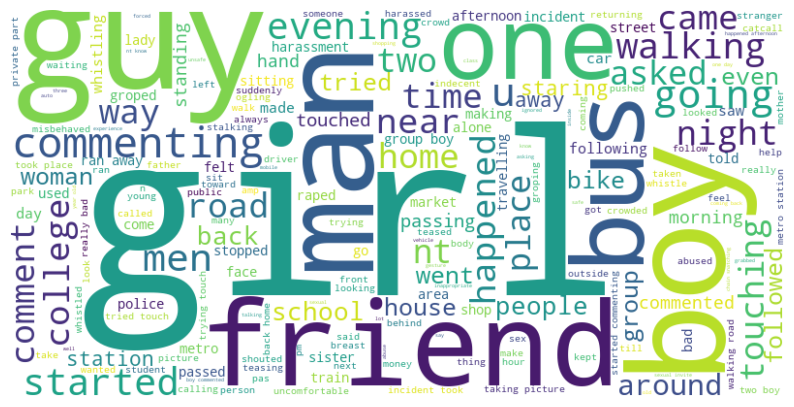

In [135]:
from wordcloud import WordCloud
import matplotlib.pyplot as plt

# Join all preprocessed text into a single string
all_text = ' '.join(df['Preprocessed_Text'])

# Generate a word cloud
wordcloud = WordCloud(width=800, height=400, background_color='white').generate(all_text)

# Display the word cloud using matplotlib
plt.figure(figsize=(10, 6))
plt.imshow(wordcloud, interpolation='bilinear')
plt.axis('off')
plt.show()